In this notebook,

    - We visualize the effects of L1 and L2 regularization. 
    - Explore the application of L1 regularization for identifying significant features.
    - Analyzed the updates to weights and gradients for L1 and L2 regularization.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

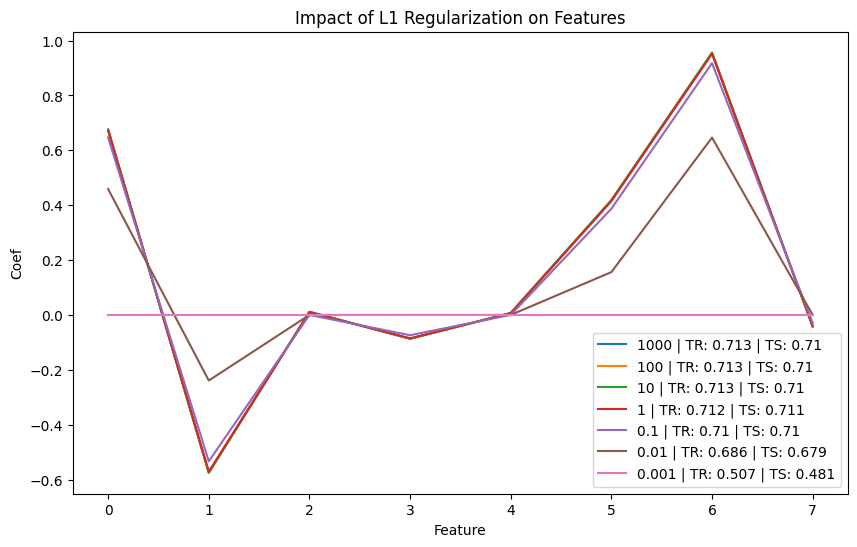

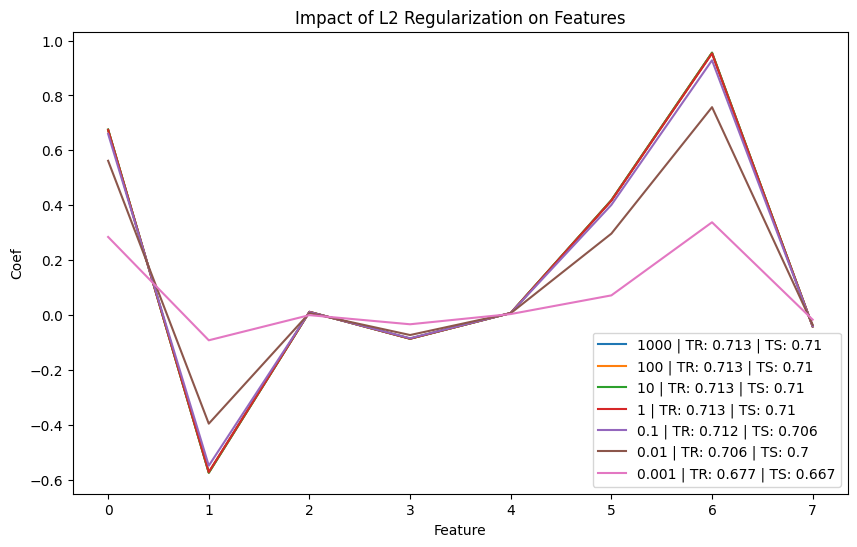

In [103]:
# Create a synthetic dataset
n_samples = 5000
feature_count = 8
important_feature_count = 4
X, y = make_classification(n_samples=n_samples, n_features=feature_count, 
                           n_informative=important_feature_count, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define regularization strengths (alphas)
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
alpha1_labels = []
alpha2_labels = []

plt.figure(figsize=(10, 6))
model1_coefs = []
for alpha in alphas:
    model1 = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
    model1.fit(X_train, y_train)
    alpha1_labels.append(str(alpha)+" | TR: "+str(round(model1.score(X_train, y_train),3))+" | TS: "+str(round(model1.score(X_test, y_test),3)))
    model1_coefs.append(model1.coef_[0])

plt.plot(np.array(model1_coefs).T, label=alpha1_labels)
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Impact of L1 Regularization on Features')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
model2_coefs = []
for alpha in alphas:
    model2 = LogisticRegression(penalty='l2', C=alpha, solver='liblinear')
    model2.fit(X_train, y_train)
    alpha2_labels.append(str(alpha)+" | TR: "+str(round(model2.score(X_train, y_train),3))+" | TS: "+str(round(model2.score(X_test, y_test),3)))
    model2_coefs.append(model2.coef_[0])

plt.plot(np.array(model2_coefs).T, label=alpha2_labels)
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Impact of L2 Regularization on Features')
plt.legend()
plt.show()


In [119]:
model1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
model1.fit(X_train[:,[0,1,3,5,6]], y_train)
print("TR: "+str(round(model1.score(X_train[:,[0,1,3,5,6]], y_train),3))+" | TS: "+str(round(model1.score(X_test[:,[0,1,3,5,6]], y_test),3)))

TR: 0.713 | TS: 0.713


## Updates to Weights and Gradients for L1 and L2 regularization

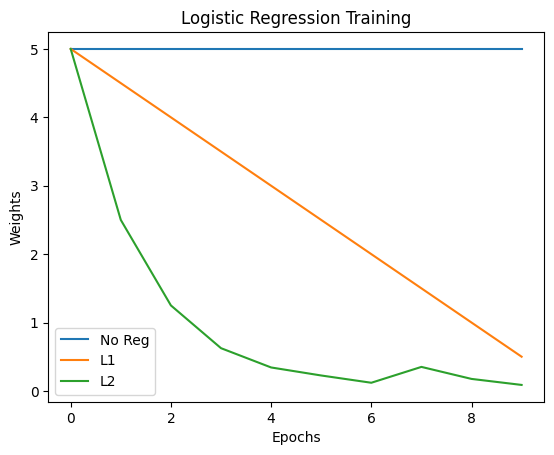

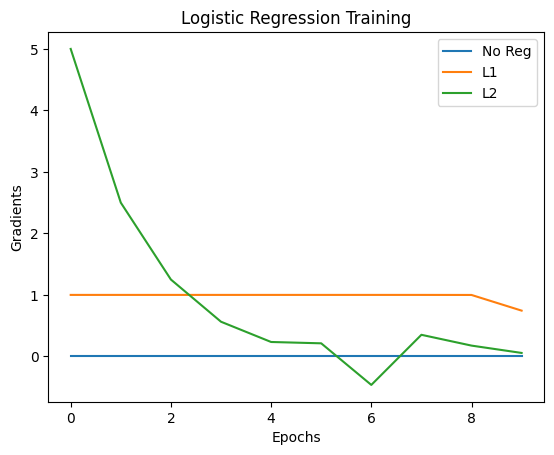

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (cross-entropy) function
def logistic_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Implement logistic regression from scratch
def logistic_regression(X, y, learning_rate, epochs, penality=None):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term

    # Initialize weights
    w = np.ones(n + 1)*5

    # Lists to store loss for visualization
    losses = []
    
    # Lists to store Weights for visualization
    weights = []
    gradients = []
    for epoch in range(epochs):
        weights.append(w)
        # Compute predicted probabilities
        y_pred = sigmoid(np.dot(X, w))

        # Compute the gradient of the loss with respect to weights
        if penality == None:
            g = (np.dot(X.T, (y_pred - y)))
        elif penality == 'l1':
            g = (np.dot(X.T, (y_pred - y)) + np.sign(w))
        elif penality == 'l2':
            g = (np.dot(X.T, (y_pred - y)) + (w))
        # Update weights using gradient descent
        gradients.append(g)
        w = w - (learning_rate * g)
        # Compute and store the loss
        loss = logistic_loss(y, y_pred)
        losses.append(loss)
    return weights, gradients, losses

# Generate synthetic data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 0).astype(int).flatten()
X = np.concatenate((X, np.ones(shape=X.shape)*10), axis=1)

# Apply logistic regression
weights, gradients, losses = logistic_regression(X, y, learning_rate=0.5, epochs=10)
l1_weights, l1_gradients, losses = logistic_regression(X, y, learning_rate=0.5, epochs=10, penality="l1")
l2_weights, l2_gradients, losses = logistic_regression(X, y, learning_rate=0.5, epochs=10, penality="l2")

# Plot the loss over epochs
plt.plot(np.array(weights)[:,0], label = "No Reg")
plt.plot(np.array(l1_weights)[:,0], label = "L1")
plt.plot(np.array(l2_weights)[:,0], label = "L2")
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.title('Logistic Regression Training')
plt.show()

# Plot the loss over epochs
plt.plot(np.array(gradients)[:,0], label='No Reg')
plt.plot(np.array(l1_gradients)[:,0], label = "L1")
plt.plot(np.array(l2_gradients)[:,0], label = "L2")
plt.xlabel('Epochs')
plt.ylabel('Gradients')
plt.legend()
plt.title('Logistic Regression Training')
plt.show()


In [197]:
print("Weight Updates when L1 is used")
l1 = np.array(l1_weights)[:,0]
print([round(l1[i+1]-l1[i],5) for i in range(len(l1)-2)])

print("Weight Updates when L2 is used")
l2 = np.array(l2_weights)[:,0]
print([round(l2[i+1]-l2[i],5) for i in range(len(l2)-2)])

Weight Updates when L1 is used
[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
Weight Updates when L2 is used
[-2.5, -1.25, -0.62498, -0.28192, -0.11724, -0.10639, 0.23185, -0.17566]


    Using L1 the weight updates are linear and they eventually reach 0, the gradient updates are +1 or -1.
    Using L2 the weight updates are 1/2 of previous weight.
    -- Referred from https://stats.stackexchange.com/questions/45643/why-l1-norm-for-sparse-models